In [ ]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import matplotlib.pyplot as plt
import pickle

import sys
sys.path.append("../../")

from src.traffic_predictor.DatasetManager import DatasetConvertor 
from src.traffic_predictor.models.ContextAssisted import PreparingDataset as PreparingDatasetCA

========== Thumb ============
Forward: Compression rate: 0.2231
========== Index ============
Forward: Compression rate: 0.2456
========== Middle ============
Forward: Compression rate: 0.2491


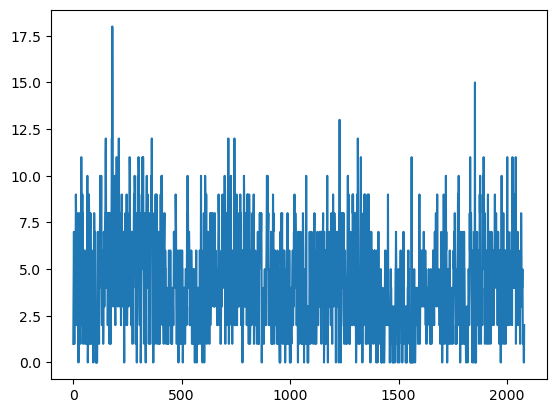

========== Thumb ============
Backward: Compression rate: 0.5344
========== Index ============
Backward: Compression rate: 0.4903
========== Middle ============
Backward: Compression rate: 0.5062


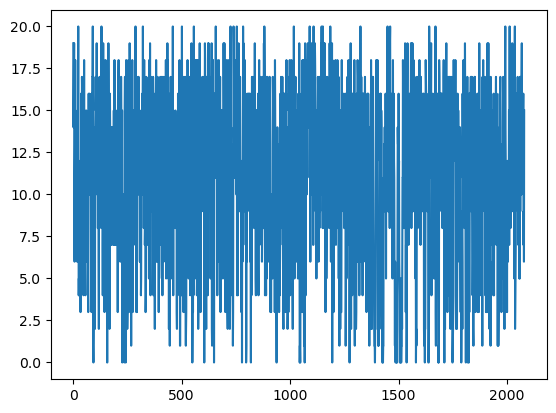

In [2]:
rawDatasetFolder = "../../data/raw"

mapping = {"forward": "fr", "backward": "bk"}
dpdr_params = [
    {"dbParameter": 0.01, "alpha": 0.01, "mode": "fixed"}, 
    {"dbParameter": 0.05, "alpha": 0.01, "mode": "fixed"}
]
for i, direction in enumerate(["forward", "backward"]):
    datasetConverter = DatasetConvertor(rawDatasetFolder)
    datasetConverter.processDataset(direction=direction, **dpdr_params[i])
    thumbDataUnit = datasetConverter.getDataUnit(f"thumb_{mapping[direction]}")
    lenWindow = 20
    paramsCA = {}
    paramsCA['lenSource'] = lenWindow
    paramsCA['lenTarget'] = lenWindow
    paramsCA['trainRatio'] = 0.6
    paramsCA['dataAugment'] = False
    paramsCA['smoothFc'] = 1.5
    paramsCA['smoothOrder'] = 3
    trainDataCA, testDataCA = PreparingDatasetCA(thumbDataUnit, paramsCA, verbose=False)
    (_,_,_,trafficCA,_,_,_,_) = testDataCA 

    plt.plot(trafficCA.flatten())
    plt.show()